In [28]:
import pandas as pd
import numpy as np

#plt.style.use('ggplot')
import statsmodels.formula.api as smf
import seaborn as sns
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
asthma_0_4 = pd.read_csv('asthma_0_4.csv')

In [4]:
asthma_0_4.head()

,UHF42,Asthma_0_4,PM,NO2
0,Kingsbridge - Riverdale,71.2,10.09,20.13
1,Northeast Bronx,132.1,9.65,20.21
2,Fordham - Bronx Pk,142.2,10.26,22.06
3,Pelham - Throgs Neck,133.1,9.68,21.04
4,Crotona -Tremont,179.7,10.99,25.25


                            OLS Regression Results                            
Dep. Variable:             Asthma_0_4   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1007
Date:                Mon, 14 Mar 2016   Prob (F-statistic):              0.751
Time:                        02:39:21   Log-Likelihood:                -870.43
No. Observations:                 163   AIC:                             1745.
Df Residuals:                     161   BIC:                             1751.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     65.1133     17.740      3.670      0.0

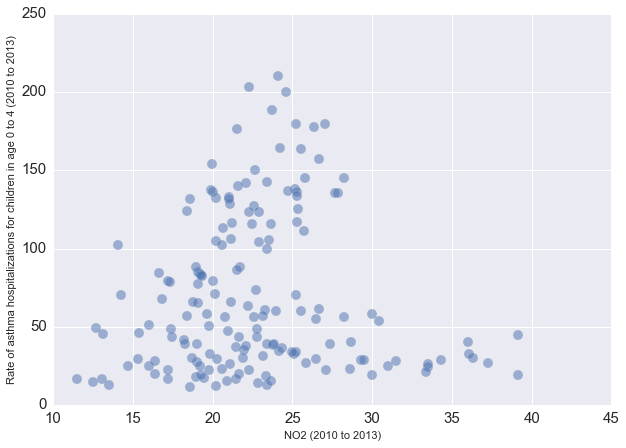

In [34]:
mod1 = smf.ols(formula = 'Asthma_0_4 ~ NO2', data = asthma_0_4, missing='drop').fit()
print mod1.summary()
#plt.figure(figsize=(8,6))
#plt.scatter(asthma_0_4['NO2'], asthma_0_4['Asthma_0_4'])

asthma_0_4[['Asthma_0_4', 'NO2']].plot(kind='scatter', x='NO2', y='Asthma_0_4',marker='o', s=100, 
                                    alpha=0.5,figsize=(10,7), fontsize=15)
plt.xlabel('NO2 (2010 to 2013)') 
plt.ylabel('Rate of asthma hospitalizations for children in age 0 to 4 (2010 to 2013)') 

                            OLS Regression Results                            
Dep. Variable:             Asthma_0_4   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2293
Date:                Mon, 14 Mar 2016   Prob (F-statistic):              0.633
Time:                        02:39:13   Log-Likelihood:                -870.36
No. Observations:                 163   AIC:                             1745.
Df Residuals:                     161   BIC:                             1751.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     56.1253     30.488      1.841      0.0

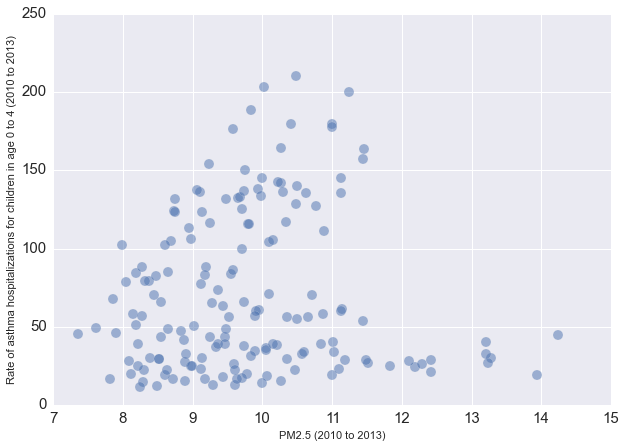

In [33]:
mod2 = smf.ols(formula = 'Asthma_0_4 ~ PM', data = asthma_0_4, missing='drop').fit()
print mod2.summary()
#plt.figure(figsize=(8,6))
#plt.scatter(asthma_0_4['PM'], asthma_0_4['Asthma_0_4'])

asthma_0_4[['Asthma_0_4', 'PM']].plot(kind='scatter', x='PM', y='Asthma_0_4',marker='o', s=100, 
                                    alpha=0.5,figsize=(10,7), fontsize=15)
plt.xlabel('PM2.5 (2010 to 2013)') 
plt.ylabel('Rate of asthma hospitalizations for children in age 0 to 4 (2010 to 2013)')

In [12]:
asthma_0_4['log_Asthma_0_4'] = np.log(asthma_0_4['Asthma_0_4'])
asthma_0_4['log_PM'] = np.log(asthma_0_4['PM'])
asthma_0_4['log_NO2'] = np.log(asthma_0_4['NO2'])

In [15]:
mod3 = smf.ols(formula = 'log_Asthma_0_4 ~ log_PM + log_NO2', data = asthma_0_4, missing='drop').fit()
print mod3.summary()

                            OLS Regression Results                            
Dep. Variable:         log_Asthma_0_4   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.454
Date:                Sun, 13 Mar 2016   Prob (F-statistic):              0.237
Time:                        22:27:21   Log-Likelihood:                -186.37
No. Observations:                 163   AIC:                             378.7
Df Residuals:                     160   BIC:                             388.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.2494      1.133      3.751      0.0